In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# weightVar = 1.3**2

# dataVar = 2.5**2
# dataMean = 1

n_hidden = 128.0
n_dim = 3.0

# biasVar = 0

n_iterations = 30
qStart = 0.0

def integrand(z, prev_q):
    return np.tanh(np.sqrt(prev_q) * z)**2 * 1.0/np.sqrt(2.0 * np.pi) * np.exp(-(z**2)/2.0)

def test(z, a):
    return a*z**2

# nextq = weightVar * n_hidden * quad(integrad, -np.inf, np.inf, args=(qStart)) 
# + weightVar * n_dim * (dataVar + dataMean**2) + biasVar
def simulate(weightVar, dataVar, dataMean, biasVar):
    dynamics = []
    for i in range(n_iterations):
        if i == 0:
            dynamics.append(qStart)
        else:
            dynamics.append(weightVar * quad(integrand, -np.inf, np.inf, args=(dynamics[i-1]))[0] \
            + weightVar * (n_dim/n_hidden) * (dataVar + dataMean**2) + biasVar)
            # Stop early if q has converged:
            r = np.absolute(dynamics[i] - dynamics[i-1])/dynamics[i-1] * 100
            if r <= 1:
                break
    return dynamics, i

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


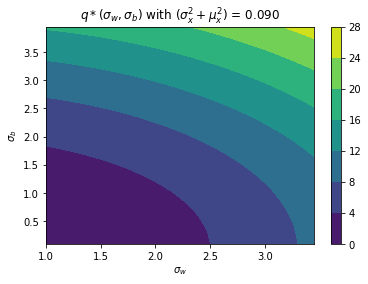

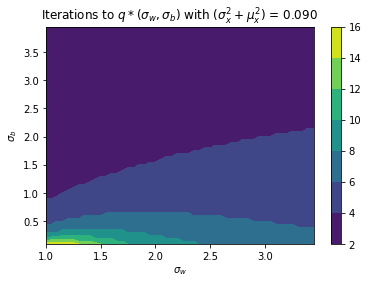

In [3]:
dataVar = 0.089609815596183001
dataMean = 0
# dataVar = 0.0
# dataMean = 0.0

delta = 0.05
w = np.arange(1.0, 3.5, delta)
b = np.arange(0.1, 4.0, delta)
W, B = np.meshgrid(w, b)
qstar = np.zeros((len(W[:,0]), len(W[0])))
convIter = np.zeros((len(W[:,0]), len(W[0])))
for i in range(len(W[:,0])):
    for j in range(len(W[0])):
        output, numIter = simulate(W[i][j]**2, dataVar, dataMean, B[i][j]**2)
        qstar[i][j] = output[-1]
        convIter[i][j] = numIter
plt.figure(1)
cp = plt.contourf(W, B, qstar)
plt.colorbar(cp)
plt.title(r'$q*(\sigma_w , \sigma_b)$ with $(\sigma_x^2 + \mu_x^2)$ = %.3f' % (dataVar + dataMean**2))
plt.xlabel(r'$\sigma_w$')
plt.ylabel(r'$\sigma_b$')
plt.show()
plt.figure(2)
cs = plt.contourf(W, B, convIter)
plt.colorbar(cs)
plt.title(r'Iterations to $q*(\sigma_w , \sigma_b)$ with $(\sigma_x^2 + \mu_x^2)$ = %.3f' % (dataVar + dataMean**2))
plt.xlabel(r'$\sigma_w$')
plt.ylabel(r'$\sigma_b$')
plt.show()